# Categorical Encoding
- How to transform/replace the category strings by a numerical representation, for the goal:
     - Produce variables that can be used to train model
     - To build predictive features form categories

**1. Categorical Encoding Techniques**
- Traditional technniques:
     - One-hot encoding 
     - Count/frequency encoding
     - Ordinal/Label encoding
- Monotonic relationship (categorical variable and target are monotonic relationship - dong bien):
     - Ordered label encoding
     - Mean encoding
     - Weight of evidence
 
*(Using monotonic can be improve the performance of linear models, or tree-base model, or if want to monotonic relationship between variable and target in model)*

- Rare labels:
     - One-hot encoding of frequent categories
     - Group rare label encoding
- Alternative techniques:
     - Binary encoding
     - Feature hasing
     - Others
 
**2. Techniques comparation**
- For `tree-base`, `one-hot` encoding has a bad performance because it has a big feature space
- For `logistic`, the `woe` encoding get the best performance.

|Index| Encoding Method | Description | Advantages | Disadvantages | Observations |
|----| ---- | ---- | ---- | ---- | ---- |
|1| One Hot Encoding | One hot encoding, consists in encoding each categorical variable with different boolean variables (also called dummy variables) which take values 0 or 1, indicating if a category is present in an observation.<br>Encoding into K or K-1 binary variable | • Straightforward to implement<br>• Makes no assumption about the distribution or categories of the categorical variable<br>• Keeps all the information of the categorical variable<br>• Suitable for linear models<br> | • Expands the feature space<br>• Does not add extra information while encoding<br>• Many dummy variables may be identical, introducing redundant information<br> | Most machine learning algorithms, consider the entire data set while being fit. Therefore, encoding categorical variables into k - 1 binary variables, is better, as it avoids introducing redundant information.<br><br>Exception: One hot encoding into k dummy variables<br><br>• when building tree based algorithms<br>• when doing feature selection by recursive algorithms<br>• when interested in determine the importance of each single category |
|2| One Hot Encoding of Frequent/Top Categories | Performing one hot encoding, only considering the most frequent categories | • Straightforward to implement<br>• Does not require hrs of variable exploration<br>• Does not expand massively the feature space<br>• Suitable for linear models | • Does not add any information that may make the variable more predictive<br>• Does not keep the information of the ignored labels | The number of top variables is set arbitrarily. It could be 15, 10 or 5 as well. This number can be chosen arbitrarily or derived from data exploration. |
|3| Integer Encoding | Integer encoding consist in replacing the categories by digits from 1 to n (or 0 to n-1, depending the implementation), where n is the number of distinct categories of the variable. | • Straightforward to implement<br>• Does not expand the feature space<br> | • Does not capture any information about the categories labels<br>• Not suitable for linear models. | • The numbers are assigned arbitrarily.<br>• This encoding method allows for quick benchmarking of machine learning models.<br> |
|4| Count or frequency encoding | • Categories are replaced by the count or percentage of observations that show that category in the dataset.<br>• Captures the representation of each label in a dataset<br>• Very popular encoding method in Kaggle competitions<br>• Assumption: the number observations shown by each category is predictive of the target. | • Straightforward to implement<br>• Does not expand the feature space<br>• Can work well enough with tree based algorithms | • Not suitable for linear models<br>• Does not handle new categories in test set automatically<br>• If 2 different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number: may lose valuable information. | |
|5| Target guided encodings - Ordered ordinal encoding | Categories are replaced by integers from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category. | • Straightforward to implement<br>• Does not expand the feature space<br>• Capture information within the category, therefore creating more predictive features<br>• Creates monotonic relationship between categories and target<br>Note: Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.<br>Specific to WOE:<br>• It orders the categories on a "logistic" scale which is natural for logistic regression<br>• The transformed variables can then be compared because they are on the same scale. Therefore, it is   possible to determine which one is more predictive. | • May lead to over-fitting<br>• Difficult to implement together with cross-validation with current libraries | • the encoding is guided by the target, and<br>• they create a monotonic relationship between the variable and the target.<br>Monotonicity<br>A monotonic relationship is a relationship that does one of the following:<br>• (1) as the value of one variable increases, so does the value of the other variable; or<br>• (2) as the value of one variable increases, the value of the other variable decreases<br>• These methods can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models<br>• Replacing categorical labels with Pandas code and this method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. |
|6| Target guided encodings - Mean encoding | Mean encoding implies replacing the category by the average target value for that category. | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding |
|7| Target guided encodings - Probability Ratio Encoding | For each category, we calculate the mean of target=1, that is the probability of the target being 1 ( P(1) ), and the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the categories by that ratio.<br>Note: These encoding is suitable for classification problems only, where the target is binary | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding |
|8| Target guided encodings - Weight of evidence | WoE = ln ( Distribution of Goods / Distribution of bads )<br>WoE = ln ( p(1) / p(0) )<br>Note: WoE is well suited for Logistic Regression | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding | Same as Ordered Ordinal Encoding |
|9| Rare Label Encoding | Rare labels are those that appear only in a tiny proportion of the observations in a dataset<br>Scenario for re-grouping:<br>  • One predominant category<br>  • A small number of categories<br>  • High cardinality<br> | • Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.<br>• Grouping categories into rare for variables with high cardinality, tends to improve model performance as well. | | • Grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business<br>• Rare labels should be identified in the training set only. |

In [72]:
# load data
import pandas as pd
from sklearn.model_selection import train_test_split

usecols = ["pclass", "sibsp", "parch", "sex", "embarked", "cabin", "survived"]
data = pd.read_csv("Datasets/titanic.csv", usecols=usecols)
data["cabin"] = data["cabin"].str[0]
data.fillna('Missing', inplace = True)

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split( data.drop("survived", axis=1), data["survived"], test_size=0.3, random_state=0)
X_train.head()

,pclass,sex,sibsp,parch,cabin,embarked
501,2,female,0,1,Missing,S
588,2,female,1,1,Missing,S
402,2,female,1,0,Missing,C
1193,3,male,0,0,Missing,Q
686,3,female,0,0,Missing,Q


## One-hot encoding
- One hot encoding, consists in encoding each categorical variable with different boolean variables (also called dummy variables) which take values `0` or `1`, indicating if a category is present in an observation. Encoding into `K` or `K-1` binary variable.
- Most ML algorithms, encoding into `k-1` binary variables is better, as avoids introducing redundant information
- Exception, encoding into `k` dummy variables in case:
     - Build tree-base model (because tree is not consider all features at the same time, instead make decision by only a random selection of features)
     - Doing feature selection by recursive algorithms
     - Want to determine the importance of each single category
 
**1. Advantages**
- Straightforward to implement
- Makes no assumption about the distribution or categories of the categorical variable
- Keeps all the information of the categorical variable
- Suitable for linear models

**2. Disadvantages**
- Expands the feature space, specially with highly cardinal categorical variables
- Does not add extra information while encoding
- May be introducing redundant information, create multi-collinearity even if we encode into k-1 because original categorical variable have rare labels

### One hot encoding with Scikit-learn

**Advantages**

- quick
- Creates the same number of features in train and test set
- works within a pipeline

**Limitations**

- need to set specific output to return pandas
- need additional transformer to encode variable subset
- changes variable names after transformation

In [73]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# set up encoder
encoder = OneHotEncoder(
    categories="auto",
    drop="first",  # to return k-1, use drop=false to return k dummies
    sparse_output=False,
    handle_unknown="error",  # helps deal with rare labels to raise error when transform new dataset
).set_output(transform="pandas")

# setup encoder for subset of variable by ColumnTransformer
ct = ColumnTransformer(
    [("encoder", encoder, ["sex", "embarked", "cabin"])], 
    remainder="passthrough" # keep remain the variables are not encoded
)

# fit the encoder (finds categories)
encoder.fit(X_train)

OneHotEncoder(drop='first', sparse_output=False)

In [74]:
# we observe the learned categories
encoder.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 9]),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype=object),
 array(['C', 'Missing', 'Q', 'S'], dtype=object)]

In [75]:
# transform the data sets
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

X_train_enc.head()

,pclass_2,pclass_3,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,...,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_Missing,cabin_T,embarked_Missing,embarked_Q,embarked_S
501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
588,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1193,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
686,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [76]:
# we can retrieve the feature names as follows:
encoder.get_feature_names_out()

array(['pclass_2', 'pclass_3', 'sex_male', 'sibsp_1', 'sibsp_2',
       'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8', 'parch_1', 'parch_2',
       'parch_3', 'parch_4', 'parch_5', 'parch_6', 'parch_9', 'cabin_B',
       'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G',
       'cabin_Missing', 'cabin_T', 'embarked_Missing', 'embarked_Q',
       'embarked_S'], dtype=object)

In [77]:
# pipeline imputation and encoder
cat_pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        (("ohe", encoder)),
    ]
)
ct = ColumnTransformer(
    [("encoder", cat_pipe, ["sex", "embarked", "cabin"])], remainder="passthrough"
)
ct.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['sex', 'embarked', 'cabin'])])

### Feature-engine

**Advantages**

- quick
- returns dataframe
- returns feature names
- allows to select features to encode
- appends dummies to original dataset

**Limitations**

- Not sure yet.

In [78]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer

# set up encoder
encoder = OneHotEncoder(
    variables=None,  # alternatively pass a list of variables
    drop_last=True,  # to return k-1, use drop=false to return k dummies
)

# fit the encoder (finds categories)
encoder.fit(X_train)

OneHotEncoder(drop_last=True)

In [79]:
X_train.dtypes

pclass       int64
sex         object
sibsp        int64
parch        int64
cabin       object
embarked    object
dtype: object

In [80]:
# automatically found numerical variables
encoder.variables_

# we observe the learned categories
encoder.encoder_dict_

{'sex': ['female'],
 'cabin': ['Missing', 'E', 'C', 'D', 'B', 'A', 'F', 'T'],
 'embarked': ['S', 'C', 'Q']}

### One hot encoding with Category encoders

**Advantages**

- quick
- returns dataframe
- returns feature names
- allows to select features to encode
- appends dummies to original dataset

**Limitations**

- No option for k-1 dummies

In [81]:
from category_encoders.one_hot import OneHotEncoder

# set up encoder
encoder = OneHotEncoder(
    cols=None,  # alternatively pass a list of variables
    use_cat_names=True,
)

## One Hot Encoding of Frequent Categories (Rare label handle)
- One hot encoding for the top most frequent labels only, and grouping all the remaining categories under a new category
- Often, categorical variables show a few dominating categories while the remaining labels add little information. Therefore, OHE of top categories is a simple and useful technique.
- This number of top frequent label can be chosen arbitrarily or derived from data exploration.

**1. Advantages**
- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space
- Suitable for linear models

**2. Disadvantages**
- Does not add any information that may make the variable more predictive.
- Does not keep the information of the ignored labels.

In [82]:
from sklearn.preprocessing import OneHotEncoder

ohe_enc = OneHotEncoder(
    handle_unknown="infrequent_if_exist",  # unseen categories will be treated like the less frequent ones
    max_categories=5,  # the number of top categories
    sparse_output=False,  # necessary for set output pandas
)

ohe_enc.set_output(transform="pandas")

ohe_enc.fit(X_train)

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [83]:
ohe_enc.infrequent_categories_

[None,
 None,
 array([3, 5, 8]),
 array([4, 5, 6, 9]),
 array(['A', 'D', 'F', 'G', 'T'], dtype=object),
 None]

In [84]:
# the categories found in each variable
ohe_enc.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 9]),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype=object),
 array(['C', 'Missing', 'Q', 'S'], dtype=object)]

In [85]:
ohe_enc.get_feature_names_out()

array(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male',
       'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_4',
       'sibsp_infrequent_sklearn', 'parch_0', 'parch_1', 'parch_2',
       'parch_3', 'parch_infrequent_sklearn', 'cabin_B', 'cabin_C',
       'cabin_E', 'cabin_Missing', 'cabin_infrequent_sklearn',
       'embarked_C', 'embarked_Missing', 'embarked_Q', 'embarked_S'],
      dtype=object)

In [86]:
# feature_engine
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=10,  # you can change this value to select more or less variables
    variables=["Neighborhood", "Exterior1st", "Exterior2nd"], # we can select which variables to encode
    drop_last=False,
)

## Label encoding / Ordinal encoding
- Replacing the categories by digits from 1 to n (or 0 to n-1) where n is the number of distinct categories of the variables
- Should use for the ordinal categorical variables

**1. Advantages**
- Straightforward to implement
- Does not expand the feature space
- Work well for tree-base model

**2. Disadvantages**
- Does not capture any information about the categories labels
- Not suitable for linear models.
- Do not handle new categories in testset or production

In [87]:
# sklearn
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder # LabelEncoder use for target variables

# cat features
cat_vars = list(X_train.select_dtypes(include="O").columns)

# let's set up the encoder
encoder = OrdinalEncoder()

# let's set up the column transformer
ct = ColumnTransformer(
    [("oe", encoder, cat_vars)],
    remainder="passthrough",
).set_output(transform="pandas")

## Count frequency encoding

- Categories are replaced by the `count` or `percentage` of observations that show that category in the dataset. Therefore, Captures the representation of each label in a dataset.
- Very popular encoding method in Kaggle competitions
- **Assumption**: the number observations shown by each category is predictive of the target. (Mức độ phổ biến của label có khả năng dự đoán cho target)

**1. Advantages**
- Straightforward to implement
- Does not expand the feature space
- Can work well enough with tree based algorithms

**2. Disadvantages**
- Not suitable for linear models
- Does not handle new categories in test set automatically
- If 2 different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number: may lose valuable information.

In [88]:
# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

count_enc = CountFrequencyEncoder(
    encoding_method="count",  # to do frequency ==> encoding_method='frequency'
    variables=cat_vars,
)

count_enc.fit(X_train)

CountFrequencyEncoder(variables=['sex', 'cabin', 'embarked'])

## Group rare label encoding (Rare label handle)
- Grouping rare labels are those that appear only in a tiny proportion of the obs in a dataset into one '`Rare`' label.
- Replacing the labels that are present only in a small percentage of the observations below a `threshold` or have a big difference in weight compared to common labels. Scenario for re-grouping:
    - One predominant category 
    - A small number of categories with the differently dominant
    - Highly cardinal categorical

**1. Advantages**
- Improve performance model with grouping categories into rare for variables that show low or high cardinality, avoid overfitting
- Handle the unseen labels in testset or production into rare label


In [89]:
from feature_engine.encoding import RareLabelEncoder

# let's load the house price dataset

data = pd.read_csv("Datasets/houseprice_train.csv").fillna("Missing")
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=["SalePrice"], axis=1),
                                                data.SalePrice,     test_size=0.3,    random_state=0)

# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4,  # minimal number of categories the variable should have to re-group rare categories
    # số lượng label tối thiểu sau khi regroup, nếu ban đầu có số lượng label ít hơn thì ko regroup nữa
    variables=["Neighborhood","Exterior1st","Exterior2nd","MasVnrType","ExterQual","BsmtCond"],  # variables to re-group
)
rare_encoder.fit(X_train)

/Users/khongdat/miniforge3/lib/python3.10/site-packages/feature_engine/encoding/rare_label.py:199: UserWarning:

The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent



RareLabelEncoder(n_categories=4,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'ExterQual', 'BsmtCond'])

In [90]:
X_train_enc = rare_encoder.transform(X_train)

In [91]:
X_train.Neighborhood.nunique()

25

In [92]:
X_train_enc.Neighborhood.value_counts()/(X_train.shape[0])

Rare       0.440313
NAmes      0.147750
CollgCr    0.102740
OldTown    0.071429
Edwards    0.069472
Sawyer     0.059687
Somerst    0.054795
Gilbert    0.053816
Name: Neighborhood, dtype: float64

## Binary encoding
- Similar One-hot encoding but minimize the increase of feature space
<img src = "_images/05cate_binary_enc.png">

In [93]:
from category_encoders.binary import BinaryEncoder

In [94]:
be = BinaryEncoder(cols = ["Neighborhood","Exterior1st","Exterior2nd"])
be.fit(X_train)

BinaryEncoder(cols=['Neighborhood', 'Exterior1st', 'Exterior2nd'],
              mapping=[{'col': 'Neighborhood',
                        'mapping':      Neighborhood_0  Neighborhood_1  Neighborhood_2  Neighborhood_3  \
 1                0               0               0               0   
 2                0               0               0               1   
 3                0               0               0               1   
 4                0               0               1               0   
 5                0               0               1               0   
 6                0               0               1               1   
 7                0               0               1               1   
 8                0               1               0               0   
 9                0               1               0               0   
 10               0               1               0               1   
 11               0               1               0               1   
 12               0               1               1               0   
 13               0               1               1               0   
 14               0               1               1               1   
 15               0               1               1               1   
 16               1               0               0               0   
 17               1               0               0               0   
 18               1               0               0               1   
 19               1               0               0               1   
 20               1               0               1               0   
 21               1               0               1               0   
 22               1               0               1               1   
 23               1               0               1               1   
 24               1               1               0               0   
 25               1               1               0               0   
-1                0               0               0               0   
-2                0               0               0               0   

     Neighborhood_4  
 1                1  
 2                0  
 3                1  
 4                0  
 5                1  
 6                0  
 7                1  
 8                0  
 9                1  
 10               0...
                        'mapping':      Exterior1st_0  Exterior1st_1  Exterior1st_2  Exterior1st_3
 1               0              0              0              1
 2               0              0              1              0
 3               0              0              1              1
 4               0              1              0              0
 5               0              1              0              1
 6               0              1              1              0
 7               0              1              1              1
 8               1              0              0              0
 9               1              0              0              1
 10              1              0              1              0
 11              1              0              1              1
 12              1              1              0              0
 13              1              1              0              1
 14              1              1              1              0
 15              1              1              1              1
-1               0              0              0              0
-2               0              0              0              0},
                       {'col': 'Exterior2nd',
                        'mapping':      Exterior2nd_0  Exterior2nd_1  Exterior2nd_2  Exterior2nd_3  Exterior2nd_4
 1               0              0              0              0              1
 2               0              0              0              1              0
 3               0              0              0              1              1
 4               0              0

## Feature hashing

In [95]:
from category_encoders.hashing import HashingEncoder

## Monotonic target guided encoding
- The encoding is guided by the target, and create `monotonic` relationship between the variables and the target. (**Đồng biến**)
- Can be used on numerical variables after discretisation (convert to discrete)
- Need to attention for handling rare labels
- **Note**: Monotonic does not mean strictly linear. Monotonic means that it increases constantly, or it decreases constantly.
- **Need to explore original relationship between categorical variables and target by the mean value of target in each label via trainset and testset**

**1. Advantages**
- Straightforward to implement
- Does not expand the feature space
- Capture information within the category, therefore creating more predictive features
- Creates monotonic relationship between categories and target, Create features suitable for linear models


**1. Disadvantages**
- May lead to over-fitting
- Difficult to implement together with cross-validation with current libraries

<AxesSubplot: xlabel='ExterQual'>

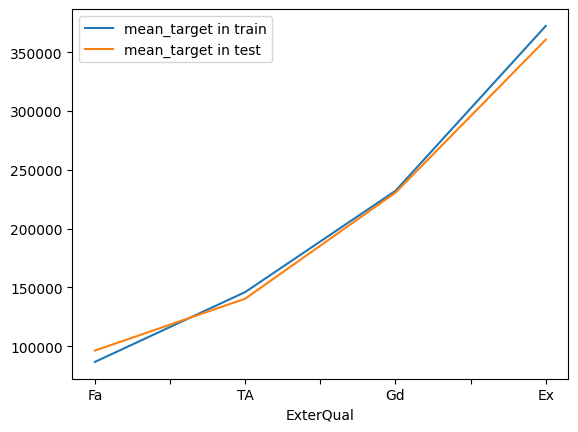

In [96]:
# function to explore monotonic relationship between target and categorical variable by train and testset
# With ordered label in trainset, we test the monotonic relationship in testset. If it was remained, that show there is a monotonic relationship
def check_monotonic(var, X_train, X_test, y_train, y_test):
    train = y_train.groupby(X_train[var]).mean().rename('mean_target in train')
    test = y_test.groupby(X_test[var]).mean().rename('mean_target in test')
    return pd.concat([train, test], axis = 1).sort_values('mean_target in train').interpolate().plot()
    
check_monotonic('ExterQual', X_train, X_test, y_train, y_test)

### Ordered ordinal encoding
- Calculate the mean of target values for each label of variable, then assign numbers following the mean of target value from 0 (for highest mean) to k-1 (for smallest mean), with k is the number of distinct values of variable
- Useful for `linear` or `non-linear` model

In [97]:
# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method="ordered",
    variables=["Neighborhood", "ExterQual"],
)

ordinal_enc.fit(X_train, y_train)

# in the encoder dict we can observe each of the top categories selected for each of the variables
ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'ExterQual': {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}}

### Mean encoding
- Replacing the category by the average target value for that category.
- IF 2 categories show the same mean of target, they will have replace by the same number, lead to loss of value between them

In [98]:
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder(variables=["Neighborhood", "ExterQual"], smoothing = 10)

In [99]:
from feature_engine.encoding import WoEEncoder

pr_enc = WoEEncoder(variables = ["Neighborhood", "ExterQual"])

### Weight of evidence encoding
- For each category `i` of `X`, replace `i` by `Woe = Ln( P(X=i|Y=1) / P(X=i|Y=0) )` 
- These encoding is suitable for `logistic Regression`, where the `target` is `binary`

- **Specific Advantages to `Weight of evidence`**:
    - It orders the categories on a "logistic" scale which is natural for logistic regression
    - The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

In [100]:
from feature_engine.encoding import WoEEncoder

pr_enc = WoEEncoder(variables = ["Neighborhood", "ExterQual"])